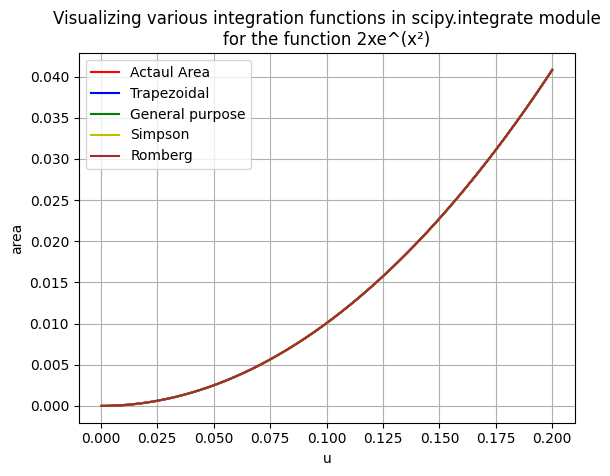

In [1]:
"""
111901030
Mayank Singla
Coding Assignment 4 - Q5
"""

# %%
from math import exp
from scipy import integrate
from numpy import linspace
import matplotlib.pyplot as plt


def inp_func(x):
    """
    Returns the value of the function 2 * x * e^(x²) at x
    """
    return 2 * x * exp(x * x)


def inp_func_integral(x):
    """
    Returns the value of the integral of the function 2 * x * e^(x²) at x
    Integral is: e^(x²)
    """
    return exp(x * x)


def visualize(func, func_integral, func_str):
    """
    Visualize as a function of u, area under the curve of input function in the interval [0, u] computed using various integration functions available in Python’s scipy.integrate module
    Also compute the exact area
    """

    # Minimum and maximum value of u taken
    u_min = 0
    u_max = 0.2

    # Number of points generated
    numPoints = 1000

    upts = linspace(u_min, u_max, numPoints)  # u-points
    upts = list(filter(lambda x: x != 0, upts))  # Removing 0 from the list
    actual_area = []  # Actual area in each interval
    trapezoidal = []  # Use trapezoidal rule to compute area
    quadrature = []  # Use general purpose integration rule to compute area
    simpson = []  # Use Simpson's rule to compute area from samples.
    romberg = []  # Use Romberg Integration to compute area

    for u in upts:
        xpts = linspace(u_min, u, numPoints)  # x-points
        ypts = [func(x) for x in xpts]  # y-points

        actual_area.append(func_integral(u) - func_integral(u_min))  # Exact area
        trapezoidal.append(integrate.trapezoid(ypts, xpts))  # Trapezoidal rule
        quadrature.append(integrate.quad(func, u_min, u)[0])  # General purpose rule
        simpson.append(integrate.simpson(ypts, xpts))  # Simpson's rule
        romberg.append(integrate.romberg(func, u_min, u))  # Romberg Integration

    # Plotting the curve

    # Giving labels and title to the curve
    plt.title(
        f"Visualizing various integration functions in scipy.integrate module\nfor the function {func_str}"
    )
    plt.xlabel("u")
    plt.ylabel("area")

    # Plotting the actual area
    plt.plot(upts, actual_area, c="r", label="Actaul Area")

    # Plotting the trapezoidal area
    plt.plot(upts, trapezoidal, c="b", label="Trapezoidal")

    # Plotting the General purpose integration
    plt.plot(upts, quadrature, c="g", label="General purpose")

    # Plotting the simpson area
    plt.plot(upts, simpson, c="y", label="Simpson")

    # Plotting the Romberg area
    plt.plot(upts, romberg, c="brown", label="Romberg")

    # Displaying the curve
    plt.grid()
    plt.legend(loc="upper left")
    plt.show()


if __name__ == "__main__":
    visualize(inp_func, inp_func_integral, "2xe^(x²)")